# Bayesian Inference

## 1. Introduction

In this activity, you will explore the problem of estimating probabilities from data using Bayesian faremework. The goal is to start with prior information on some paramater of interest (Ex. $\theta$) and update it according to some observed data. Based on the Bayes' theorom, **_posterior_** distribution incorporates observations $x$ into the distribution of the parameter of interest. In this setup posterior distribution serves as a summary of data and can be expressed as the following:

$$
p(\theta | x) = \frac{p(x|\theta)p(\theta)}{\int_{\theta}p(x|\theta)p(\theta)d\theta}
$$

Here $p(x|\theta)$ is the likelihood (model) distribution that summarizes the information about experimental data and $p(\theta)$ is the prior distribution that quantifies available knowledge about the parameter of interest, and also describes the uncertainty about this parameter before data are observed. In other words prior distribution describes our best guess about parameters before obeserving the data.

## 2. Estimating Chemotherapy Response Rates

### 2.1 Prior distribution: $p(\theta)$

Efficacy of a new chemotherapy medication is under investigation. Based on a preliminary results using sample aize of 10 it is belived that on average 90% of patients will respond to this medication. Also investigators belive that it will be unlikely that this proportion will go bellow 80%. Define and plot a prior distribution based on this preliminary result. **Hint:** You can consider using the Beta function.

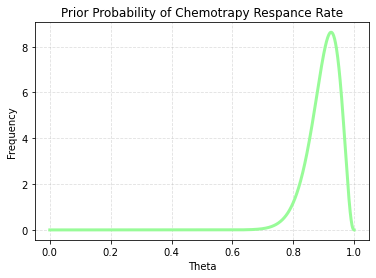

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# mean and standard deviation
mu = 0.9
sigma = (mu - 0.8)/2

# using method of moments to define the beta distribution parameters a an b
a = mu*( (mu*(1-mu)/(sigma**2)) - 1 )
b = (1 - mu) * ( (mu*(1-mu)/(sigma**2)) - 1 )

# domain θ
theta_range = np.linspace(0, 1, 1000)
# prior distribution P(theta) is beta distribution
prior = stats.beta.pdf(x = theta_range, a=a, b=b)
# prior = 1000*prior/np.sum(prior)

# plot the prior
plt.plot(theta_range, prior, linewidth=3, color='palegreen')

# add labels and title
plt.title('Prior Probability of Chemotrapy Respance Rate')
plt.ylabel('Frequency')
plt.xlabel('Theta')

# Add a grid
plt.grid(alpha=.4, linestyle='--')

plt.show()


### Solution Comments

A proper prior probability distribution for the cases that we are dealing with proportion of population (Ex. rate of response to treatment) is Beta distribution. According to the provided data, we can assume that:

$\mu = 0.9, \mu - 2\sigma=0.8$

Beta distribution is defined by two parameters $a$ and $b$ which can be calculated as follows using the method of moments:

$$
\begin{align}
a &= \mu\left(\frac{\mu(1-\mu)}{\sigma^{2}} - 1\right) \\
b &= (1-\mu)(\left(\frac{\mu(1-\mu)}{\sigma^{2}} - 1\right)
\end{align}
$$



### 2.2 Likelihood distribution: $p(x|\theta)$

During a new trial, following data was collected:

$[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]$

Select and plot a lileklihood function for all possible $\theta$ ranges. **Hint:** A propoer likelihood function would be a binomial distribution.

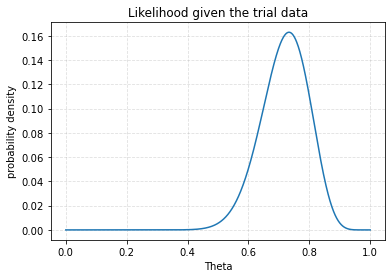

In [2]:
# Using Binomial for the likelihood distribution

trial_data = np.array([1,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1])
likelihood = stats.binom.pmf(k = np.sum(trial_data), n = len(trial_data), p = theta_range)
# likelihood = 1000*likelihood/np.sum(likelihood)

plt.plot(theta_range, likelihood)

# add labels and title
plt.title('Likelihood given the trial data')
plt.ylabel('probability density')
plt.xlabel('Theta')

# add grid

# Add a grid
plt.grid(alpha=.4, linestyle='--')

plt.show()


### solution comments

Here, the likelihood function follows a binomial distribution with sample size of 30 and success rate of 22/30. The plot show the probability of observing current sample given different parameter $\theta$'s (response rates).

### 2.3 Posterior Distribution: $p(\theta|x)$

Compute and plot the posterior distribution along with the prior and likelihood distributions. Explain the results. What is the most likely value for the parameter of interest.

Compare analytical vs numerical marginal: 0.019419704442117366 ,0.019419704442117314
Area under the curve for the posterior distribution is 0.9999999999999972


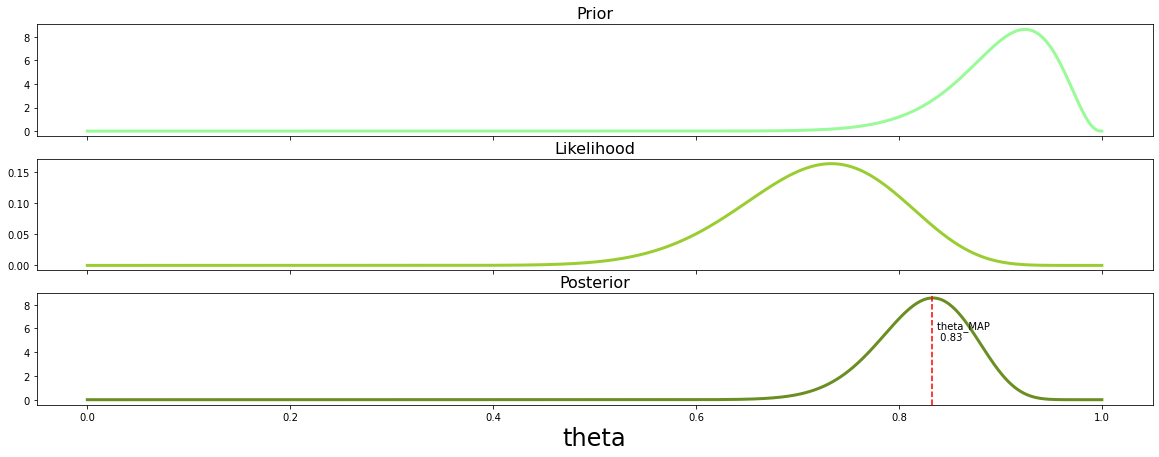

In [3]:
from scipy import integrate


# compute prior * likelihood for the range of theta [0,1]

posterior_raw = prior * likelihood # elementwise multiplication for all possible values of theta

# calculate marginal using the analytical solution
marginal = stats.betabinom.pmf(k = np.sum(trial_data), n = len(trial_data), a = a, b = b)

# Alternatively use numerical integration if analytical solution is not povided

# Note that in practice, when dealing with multivariate data, this approach becomes 
# extensively difficult. In those cases, other numerical methods based on random sampling 
# is used.
marg = np.trapz(posterior_raw,theta_range)

print(f'Compare analytical vs numerical marginal: {marginal} ,{marg}')
                         
                         
# normalize posterior to have unit area
posterior = posterior_raw/ marginal 

# get the theta at maximum posterior posterior distribution value
max_theta = theta_range[np.argmax(posterior)]

# check the area of posterior distribution
print(f'Area under the curve for the posterior distribution is {np.trapz(posterior_raw/marginal,theta_range)}')


# plot the prior, likelihood, and posterior probabilities

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
plt.xlabel('theta', fontsize=24)

axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
axes[0].set_title("Prior", fontsize=16)

axes[1].plot(theta_range, likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
axes[1].set_title("Likelihood", fontsize=16)

axes[2].plot(theta_range, posterior, label='Posterior', linewidth=3, color='olivedrab')
axes[2].set_title("Posterior", fontsize=16)
axes[2].axvline(x= max_theta, color='red', linestyle='--')
axes[2].text(max_theta + 0.005, 5, f'theta_MAP \n {max_theta:.2f}')


plt.show()


### solution notes - Conjugate priors

A major difficulty in Bayesian analysis is finding an explicit posterior distribution, given the likelihood and prior. The posterior is proportional to the product of the likelihood and prior, but the normalizing constant, marginal distribution, is often difficult to find since it involves integration. In this particular case, we have binomial likelihood and beta prior. For a binomial likelihood distribution, we will have:

$$
p(x|\theta) = \binom{n}{x}\theta^{x}(1-\theta)^{n-x}
$$

Here $\theta$ is the population proportion of interest.

For a prior beta distribution, we will have:

$$
p(\theta) = \frac{1}{B(a,b)}\theta^{a-1}(1-\theta)^{b-1}
$$

Here $B(.,.)$ is called beta function which is a normalizing function.

The posterior is proportional to the product of the likelihood and the prior:

$$
p(\theta|x) = C\cdot\theta^{x}(1-\theta)^{n-x}\cdot\theta^{a-1}(1-\theta)^{b-1} = C\cdot\theta^{x+a-1}(1-\theta)^{n-x+b-1}
$$

Where C is a normalizing constant and is described by:

$$
\frac{\binom{n}{x}}{p(x)B(a,b)}
$$

It is easy to see that the posterior density remains beta with parameters: $x+a$ and $n-x+b$, with a normalizing constant of $\frac{1}{B(x+a,n-x+b)}$, therefore, we can write:

$$
\begin{align}
C &= \frac{\binom{n}{x}}{p(x)B(a,b)} = \frac{1}{B(x+a,n-x+b)} \\
p(x) &= \frac{\binom{n}{x}B(x+a,n-x+b)}{B(a,b)}
\end{align}
$$

which is known as a beta-binomial distribution. In this example, the effect of likelihood is only to update the prior parameters and not to change the prior’s functional form. Such priors are **conjugate** with the likelihood.

Note that our initial guess about parameters was $p(\theta)$. Now that more data were made availabe, we are upgrading our prior information into a more informative guess $p(\theta|x)$. The most likely value for this parameter can be estimated by finding the maximum value of posterior distribution (**maximum a posteriori [MAP]**).